<img src="https://github.com/FASSt-simulation/fasst_simulation_tools/raw/main/images/site-logo.png" width=150 height=150 />

# Tutorial: *Exploring radiation components of ELM Simulations at NGEE Sites*
This tutorial explores the radiation components of ELM simulations at one of the four [NGEE-Arctic](https://ngee-arctic.ornl.gov/) study sites.


### --------------------------------------------------------------------------------

<br>

#### To run this script and generate the plots we need specific Python libraries.  This step loads those libraries so we can use them throughout this script

In [1]:
# Load the required Python libraries

import matplotlib.pyplot as plt
import xarray
from netCDF4 import Dataset 
import os
import cftime
import ipywidgets as widgets
import glob, numpy

<br>

#### This step identifies all of the previous ELM cases that are stored in your output location then creates a list to select the output by site

In [2]:
# Create case run output directories

output_rootdir=os.path.expanduser('~')+'/output/cime_run_dirs/'
cases=numpy.asarray(glob.glob("%s*20TR*" % output_rootdir))
cases=[x.split('/')[-1] for x in cases]
cases_dropdown = widgets.Dropdown(options=cases,
                                description='Chose Case Name:',
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [3]:
# Show a dropdown menu to select specific case output
# Any cases that have been run in our elmoutput directory will be displayed
# Case names will contain the site codes:
# AK-BEO; AK-CLG; AK-K64G AK-TLG

display(cases_dropdown)

Dropdown(description='Chose Case Name:', layout=Layout(width='max-content'), options=('OLMT_AK-BEOG_ICB20TRCNP…

In [4]:
# Get the output nc file options

output_casedir=output_rootdir+cases_dropdown.value+'/run/'
filenames=numpy.asarray(glob.glob("%s*.elm.h?.*.nc" % output_casedir))
filenames=sorted([x.split('/')[-1] for x in filenames])
if(os.path.exists(output_casedir+'ELM_output.nc')): filenames.insert(0,'ELM_output.nc')

ncfiles_dropdown = widgets.Dropdown(options=filenames,
                                description='Choose Output File:', 
                                style={'description_width':'auto'},
                                layout={'width':'max-content'},
                                disabled=False)

In [5]:
# Display the output nc file options - in most cases you will select ELM_output.nc

display(ncfiles_dropdown)

Dropdown(description='Choose Output File:', layout=Layout(width='max-content'), options=('ELM_output.nc', 'OLM…

In [6]:
# Set the output

output_file=output_casedir+ncfiles_dropdown.value

In [7]:
# Load model output data into xarray format. 
# squeeze removes an empty grid cell dimension assuming this is a single point run

elm_output=xarray.open_dataset(output_file).squeeze()

In [8]:
# show the contents of elm_output

print(elm_output)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 60226, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 2015-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float3

Text(0.5, 1.0, 'FSDS: JJA')

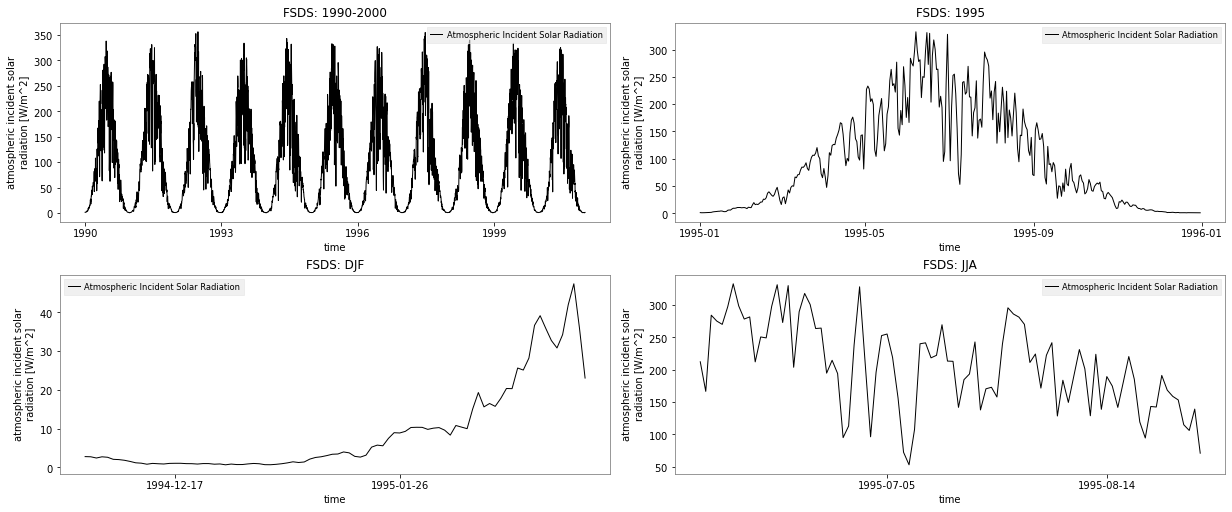

In [9]:
# Plot annual and seasonal patterns of total atmospheric incident solar radiation (FSDS)

# Subset output to the 1990-2000 period
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-06-01','1995-08-31')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,7))

ax=a[0,0]
elm_output['FSDS'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1990-2000')

ax=a[0,1]
elm_output['FSDS'].sel(time=timerange_2).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1995')

ax=a[1,0]
elm_output['FSDS'].sel(time=timerange_3).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: DJF')

ax=a[1,1]
elm_output['FSDS'].sel(time=timerange_4).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: JJA')

Text(0.5, 1.0, 'FSDSVI')

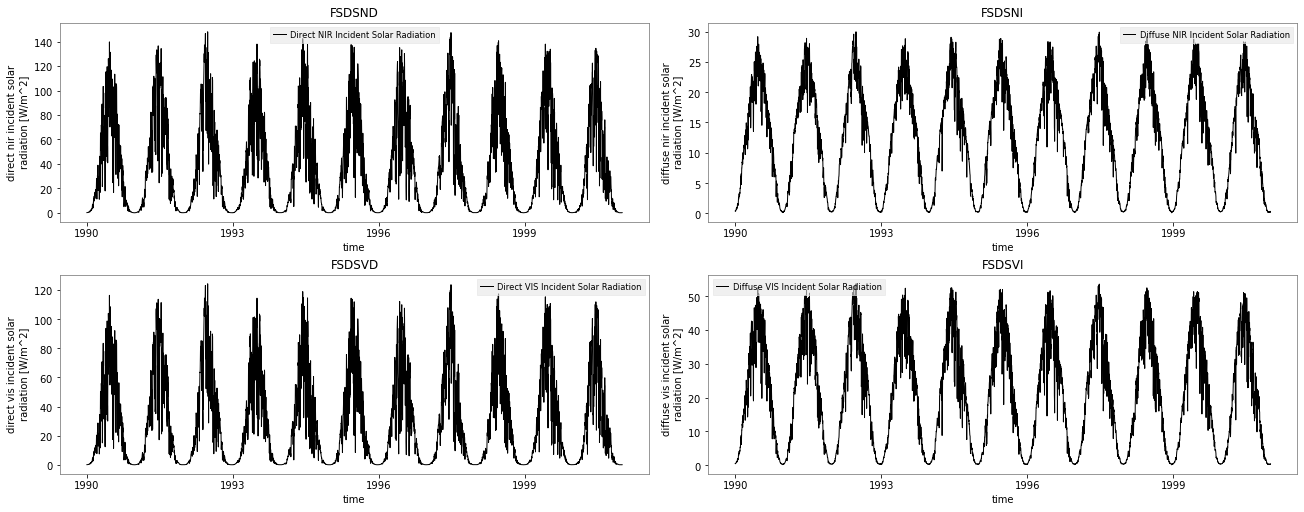

In [10]:
# Atmospheric Radiation Components

# Subset output to the 1990-2000 period
timerange_1=slice('1990-01-01','2001-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0,0]
elm_output['FSDSND'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct NIR Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSND')

ax=a[0,1]
elm_output['FSDSNI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse NIR Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSNI')

ax=a[1,0]
elm_output['FSDSVD'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct VIS Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSVD')

ax=a[1,1]
elm_output['FSDSVI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse VIS Incident Solar Radiation')
ax.legend()
ax.set_title('FSDSVI')


Text(0.5, 1.0, 'FSRVI')

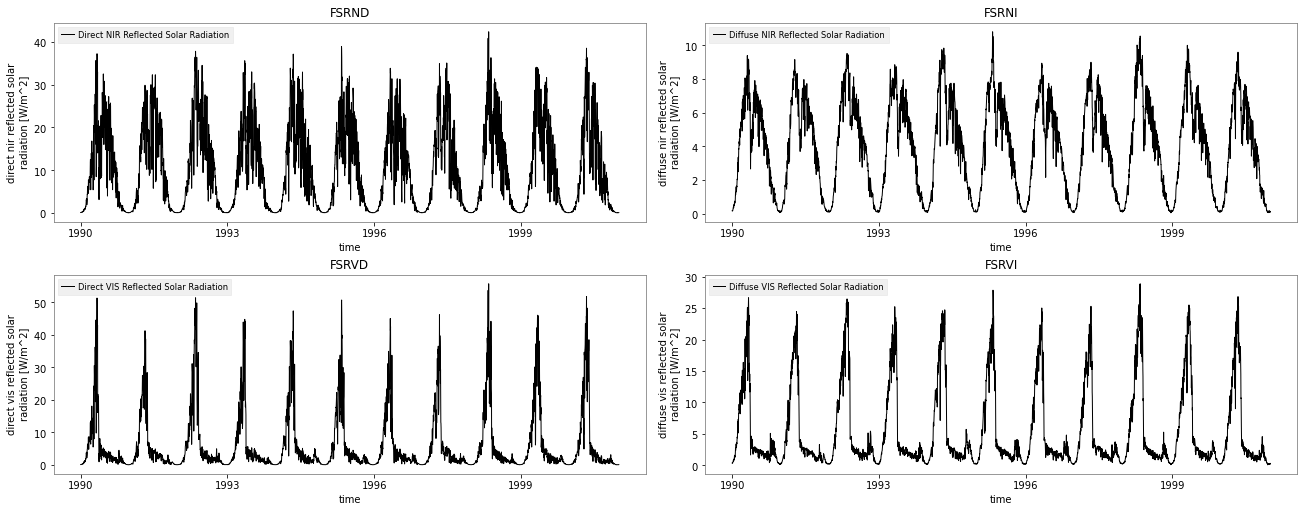

In [11]:
# Surface Radiation Components

# Subset output to the 1990-2000 period
timerange_1=slice('1990-01-01','2001-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0,0]
elm_output['FSRND'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct NIR Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRND')

ax=a[0,1]
elm_output['FSRNI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse NIR Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRNI')

ax=a[1,0]
elm_output['FSRVD'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Direct VIS Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRVD')

ax=a[1,1]
elm_output['FSRVI'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Diffuse VIS Reflected Solar Radiation')
ax.legend()
ax.set_title('FSRVI')

Text(0.5, 1.0, 'FSR: 1990-2000')

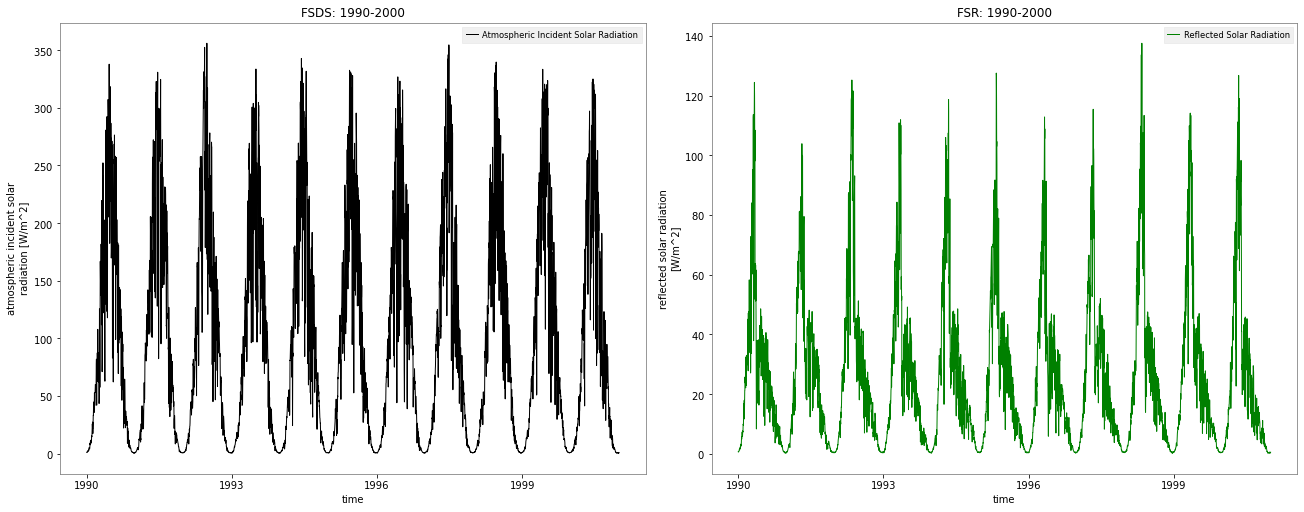

In [12]:
# Incident vs Reflected Radiation

# Subset output to the 1990-2000 period
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-06-01','1995-08-31')


# Create the figure
fig,a=plt.subplots(nrows=1,ncols=2,clear=True,num='Radiation',figsize=(18,7))

ax=a[0]
elm_output['FSDS'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='black',label='Atmospheric Incident Solar Radiation')
ax.legend()
ax.set_title('FSDS: 1990-2000')

ax=a[1]
elm_output['FSR'].sel(time=timerange_1).plot(ax=ax,linestyle='-',color='green',label='Reflected Solar Radiation')
ax.legend()
ax.set_title('FSR: 1990-2000')



Text(0.5, 1.0, 'All-sky Albedo')

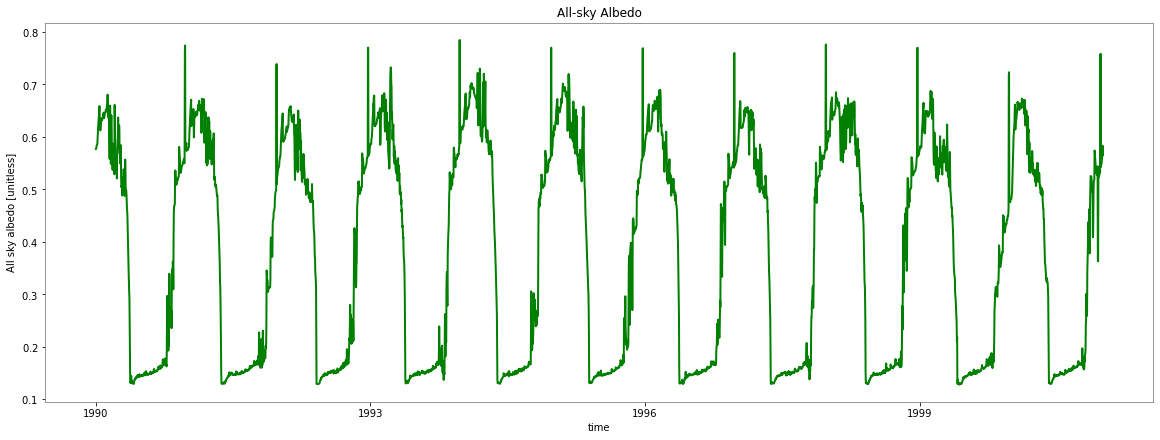

In [13]:
# Derived variable example
# Calculate all-sky albedo and plot the timeseries

elm_output['ASA'] = elm_output['FSR']/elm_output['FSDS'].where(elm_output['FSDS']>0)
elm_output['ASA'].attrs['units'] = 'unitless'
elm_output['ASA'].attrs['long_name'] = 'All sky albedo'

# Subset output to the 1990-2000 period
timerange=slice('1990-01-01','2001-01-01')

fig, ax = plt.subplots(clear=True, figsize=(16,6))
elm_output['ASA'].sel(time=timerange).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('All-sky Albedo')

Text(0.5, 1.0, 'ASA: SON')

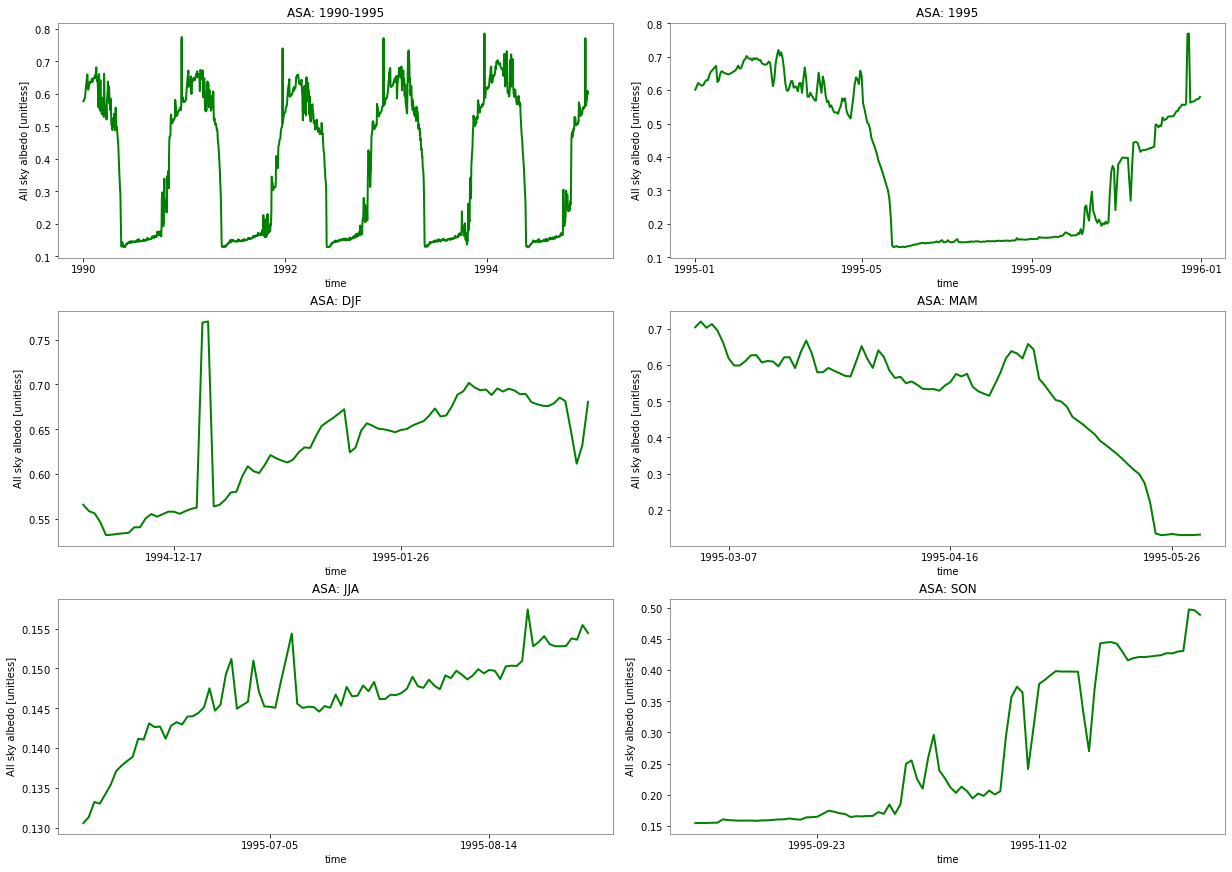

In [14]:
# Plot different albedo time-slices

# Subset output to the 1990-1995 period
timerange_1=slice('1990-01-01','1995-01-01')
# chunk out met seasons
timerange_2=slice('1995-01-01','1995-12-31')
timerange_3=slice('1994-12-01','1995-02-28')
timerange_4=slice('1995-03-01','1995-05-31')
timerange_5=slice('1995-06-01','1995-09-01')
timerange_6=slice('1995-09-01','1995-12-01')


# Create the figure
fig,a=plt.subplots(nrows=3,ncols=2,clear=True,num='Radiation',figsize=(17,12))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-1995')
ax=a[0,1]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1995')
ax=a[1,0]
elm_output['ASA'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: DJF')
ax=a[1,1]
elm_output['ASA'].sel(time=timerange_4).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: MAM')
ax=a[2,0]
elm_output['ASA'].sel(time=timerange_5).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: JJA')
ax=a[2,1]
elm_output['ASA'].sel(time=timerange_6).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: SON')

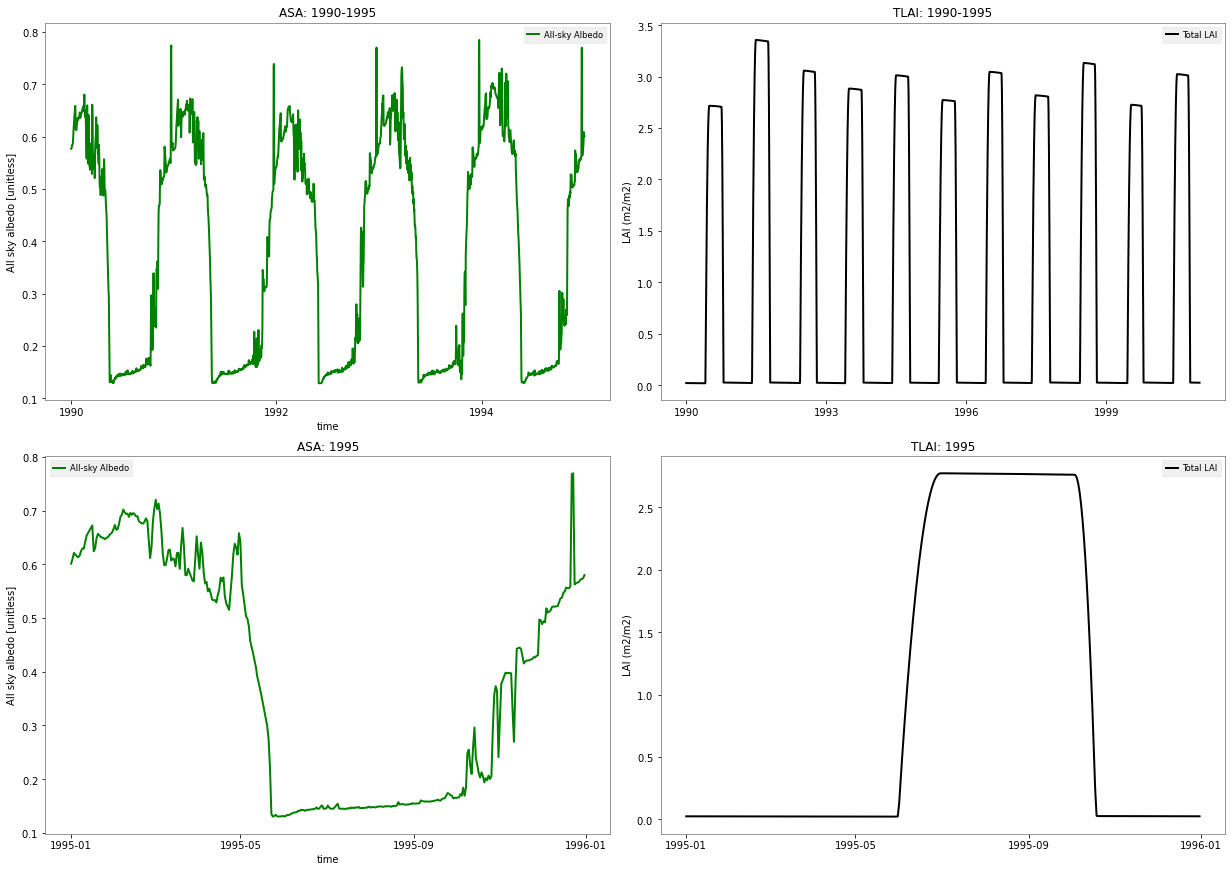

In [15]:
# Albedo and LAI

# Subset output to the 1990-1995 period
timerange_1=slice('1990-01-01','1995-01-01')
timerange_2=slice('1995-01-01','1995-12-31')


# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,12))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-1995')
ax.legend()

ax=a[0,1]
elm_output['TLAI'].sel(time=timerange).plot(ax=ax,linestyle='-',linewidth=2,color='black',label='Total LAI')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.set_title('TLAI: 1990-1995')
ax.legend()

ax=a[1,0]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1995')
ax.legend()

ax=a[1,1]
elm_output['TLAI'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='black',label='Total LAI')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.set_title('TLAI: 1995')
ax.legend()

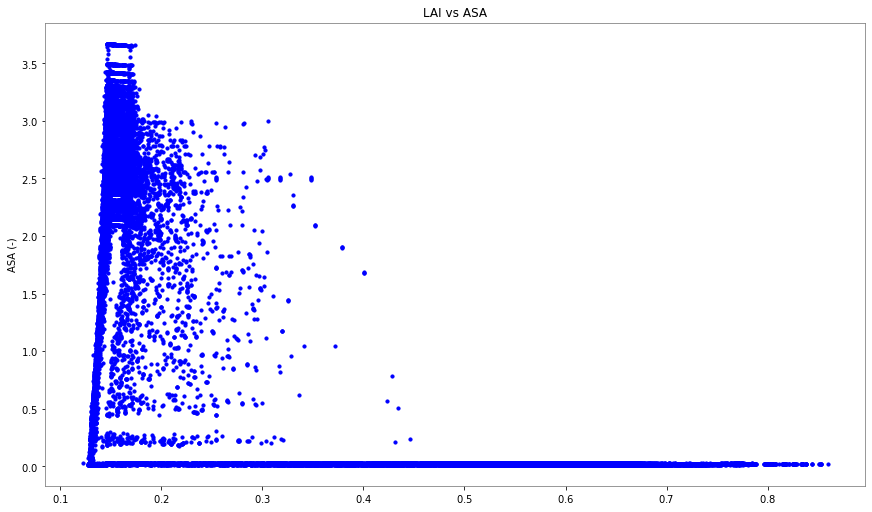

In [16]:
# LAI vs ASA
fig, ax = plt.subplots(clear=True, figsize=(12,7))
ax.scatter(elm_output['ASA'], elm_output['TLAI'], s=10, c='blue')
ax.set(title='',xlabel='',ylabel='LAI (m2/m2)')
ax.set(title='',xlabel='',ylabel='ASA (-)')
ax.set_title('LAI vs ASA')
plt.show()

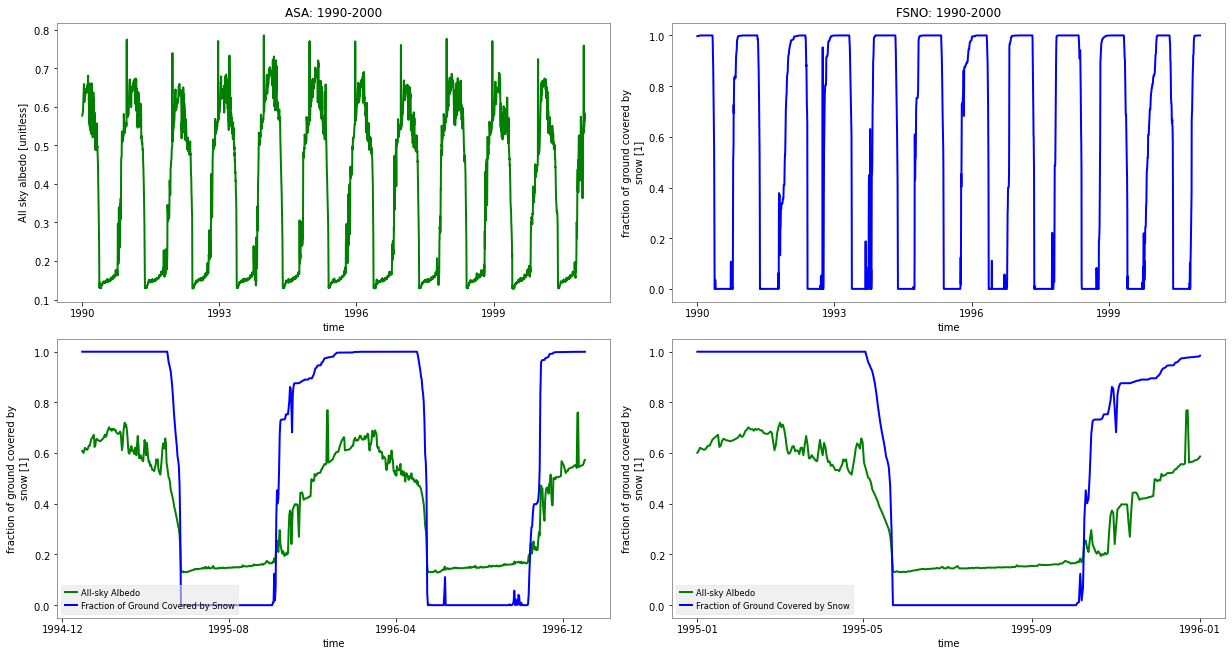

In [17]:
# Albedo vs snow fraction

# Subset output to the 1990-2000 period
timerange_1=slice('1990-01-01','2001-01-01')
timerange_2=slice('1994-12-30','1997-01-02')
timerange_3=slice('1995-01-01','1996-01-01')

# Create the figure
fig,a=plt.subplots(nrows=2,ncols=2,clear=True,num='Radiation',figsize=(17,9))

ax=a[0,0]
elm_output['ASA'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
ax.set_title('ASA: 1990-2000')

ax=a[0,1]
elm_output['FSNO'].sel(time=timerange_1).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.set_title('FSNO: 1990-2000')

ax=a[1,0]
elm_output['ASA'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
elm_output['FSNO'].sel(time=timerange_2).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.legend(loc='lower left')

ax=a[1,1]
elm_output['ASA'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='green',label='All-sky Albedo')
elm_output['FSNO'].sel(time=timerange_3).plot(ax=ax,linestyle='-',linewidth=2,color='blue',label='Fraction of Ground Covered by Snow')
ax.legend()